#FINRL Train Stock Trading
https://github.com/AI4Finance-LLC/FinRL/blob/master/finrl/train.py

In this work SAC used as RL agorithm rather than D Q-Network. The reason of this choice explained in "Train Model" section.

Multi-stock trading data used in train and trade data part. So this work related to multi-stock trading with RL. DOW The latest market data for all 30 stocks in the Dow Jones Industrial Average. So in this work there is "BIST_30_TICKER" relates with that.



#SETUP

In [2]:
 # Install the unstable development version in Jupyter notebook:
!pip install git+https://github.com/AI4Finance-LLC/FinRL-Library.git

  Cloning https://github.com/AI4Finance-LLC/FinRL-Library.git to /tmp/pip-req-build-pcc454uz
  Running command git clone -q https://github.com/AI4Finance-LLC/FinRL-Library.git /tmp/pip-req-build-pcc454uz
  Cloning https://github.com/quantopian/pyfolio.git to /tmp/pip-install-3qzjin29/pyfolio_2de1636a12374a37aefc64d356160d6f
  Running command git clone -q https://github.com/quantopian/pyfolio.git /tmp/pip-install-3qzjin29/pyfolio_2de1636a12374a37aefc64d356160d6f
     |████████████████████████████████| 172 kB 6.4 MB/s 
     |████████████████████████████████| 49.6 MB 5.3 kB/s 
     |████████████████████████████████| 1.8 MB 48.0 MB/s 
     |████████████████████████████████| 124 kB 47.9 MB/s 
     |████████████████████████████████| 108 kB 50.9 MB/s 
     |████████████████████████████████| 40 kB 5.3 MB/s 
     |████████████████████████████████| 2.0 MB 39.7 MB/s 
     |████████████████████████████████| 153 kB 49.5 MB/s 
     |████████████████████████████████| 52 kB 1.4 MB/s 
     |███████████

In [3]:
#for data download part -- yahoo finance
!pip install yfinance

In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing

matplotlib.use("Agg")
import datetime

from finrl.apps import config
from finrl.neo_finrl.preprocessor.yahoodownloader import YahooDownloader
from finrl.neo_finrl.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.neo_finrl.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.drl_agents.stablebaselines3.models import DRLAgent
from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline

import itertools


/usr/local/lib/python3.7/dist-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


In [5]:
import pandas as pd
import yfinance as yf

#Collect Data

In [6]:
stockList = ["AKBNK.IS","ARCLK.IS","ASELS.IS","BIMAS.IS","DOHOL.IS","EKGYO.IS","EREGL.IS","FROTO.IS","GARAN.IS","GUBRF.IS","HALKB.IS","ISCTR.IS","KCHOL.IS","KOZAA.IS","KOZAL.IS",
"KRDMD.IS","PETKM.IS","PGSUS.IS","SAHOL.IS","SASA.IS","SISE.IS","TAVHL.IS","TCELL.IS","THYAO.IS","TKFEN.IS","TTKOM.IS","TUPRS.IS","VAKBN.IS","VESTL.IS","YKBNK.IS"]
len(stockList)

30

In [7]:
# print("==============Start Fetching Data===========")
# df = YahooDownloader(
#     start_date=config.START_DATE,
#     end_date=config.END_DATE,
#     ticker_list=stockList,
# ).fetch_data()

In [8]:
tickers = ["VESTL.IS","VAKBN.IS","TUPRS.IS","THYAO.IS","HALKB.IS","SASA.IS","PETKM.IS","SAHOL.IS","PGSUS.IS","GARAN.IS","AKBNK.IS","ARCLK.IS","BIMAS.IS","EREGL.IS"] # 20 tane hisse


In [9]:
date1="2020-08-31"
date2="2021-08-31"
list_data = []
for ticker in tickers:
  data = yf.download(tickers=ticker , start=date1, end=date2, interval='1h' )
  data["tic"] = ticker
  data["date"] = data.index
  data = data.reset_index()
  list_data.append(data)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [10]:
list_data

[                         index       Open  ...       tic                      date
 0    2020-08-31 09:30:00+03:00  17.950001  ...  VESTL.IS 2020-08-31 09:30:00+03:00
 1    2020-08-31 10:30:00+03:00  18.120001  ...  VESTL.IS 2020-08-31 10:30:00+03:00
 2    2020-08-31 11:30:00+03:00  18.450001  ...  VESTL.IS 2020-08-31 11:30:00+03:00
 3    2020-08-31 12:30:00+03:00  18.660000  ...  VESTL.IS 2020-08-31 12:30:00+03:00
 4    2020-08-31 13:30:00+03:00  18.750000  ...  VESTL.IS 2020-08-31 13:30:00+03:00
 ...                        ...        ...  ...       ...                       ...
 1974 2021-08-27 12:30:00+03:00  28.360001  ...  VESTL.IS 2021-08-27 12:30:00+03:00
 1975 2021-08-27 13:30:00+03:00  28.459999  ...  VESTL.IS 2021-08-27 13:30:00+03:00
 1976 2021-08-27 14:30:00+03:00  28.760000  ...  VESTL.IS 2021-08-27 14:30:00+03:00
 1977 2021-08-27 15:30:00+03:00  28.700001  ...  VESTL.IS 2021-08-27 15:30:00+03:00
 1978 2021-08-27 16:30:00+03:00  28.840000  ...  VESTL.IS 2021-08-27 16:30:0

In [11]:
import pandas as pd
df = pd.concat(list_data)

# del df['date']

In [12]:

df.isna().sum()
multi_ticker_df = df.ffill().bfill()
print(multi_ticker_df)

                         index       Open  ...       tic                      date
0    2020-08-31 09:30:00+03:00  17.950001  ...  VESTL.IS 2020-08-31 09:30:00+03:00
1    2020-08-31 10:30:00+03:00  18.120001  ...  VESTL.IS 2020-08-31 10:30:00+03:00
2    2020-08-31 11:30:00+03:00  18.450001  ...  VESTL.IS 2020-08-31 11:30:00+03:00
3    2020-08-31 12:30:00+03:00  18.660000  ...  VESTL.IS 2020-08-31 12:30:00+03:00
4    2020-08-31 13:30:00+03:00  18.750000  ...  VESTL.IS 2020-08-31 13:30:00+03:00
...                        ...        ...  ...       ...                       ...
1974 2021-08-27 12:30:00+03:00  18.469999  ...  EREGL.IS 2021-08-27 12:30:00+03:00
1975 2021-08-27 13:30:00+03:00  18.530001  ...  EREGL.IS 2021-08-27 13:30:00+03:00
1976 2021-08-27 14:30:00+03:00  18.660000  ...  EREGL.IS 2021-08-27 14:30:00+03:00
1977 2021-08-27 15:30:00+03:00  18.540001  ...  EREGL.IS 2021-08-27 15:30:00+03:00
1978 2021-08-27 16:30:00+03:00  18.540001  ...  EREGL.IS 2021-08-27 16:30:00+03:00

[27

In [13]:
multi_ticker_df.reset_index()
multi_ticker_df

,index,Open,High,Low,Close,Adj Close,Volume,tic,date
0,2020-08-31 09:30:00+03:00,17.950001,18.150000,17.850000,18.120001,18.120001,0,VESTL.IS,2020-08-31 09:30:00+03:00
1,2020-08-31 10:30:00+03:00,18.120001,18.520000,18.070000,18.450001,18.450001,1737420,VESTL.IS,2020-08-31 10:30:00+03:00
2,2020-08-31 11:30:00+03:00,18.450001,18.700001,18.440001,18.660000,18.660000,965277,VESTL.IS,2020-08-31 11:30:00+03:00
3,2020-08-31 12:30:00+03:00,18.660000,18.889999,18.590000,18.750000,18.750000,1241030,VESTL.IS,2020-08-31 12:30:00+03:00
4,2020-08-31 13:30:00+03:00,18.750000,18.750000,18.430000,18.530001,18.530001,395668,VESTL.IS,2020-08-31 13:30:00+03:00
...,...,...,...,...,...,...,...,...,...
1974,2021-08-27 12:30:00+03:00,18.469999,18.530001,18.450001,18.520000,18.520000,1148847,EREGL.IS,2021-08-27 12:30:00+03:00
1975,2021-08-27 13:30:00+03:00,18.530001,18.670000,18.520000,18.660000,18.660000,4445429,EREGL.IS,2021-08-27 13:30:00+03:00
1976,2021-08-27 14:30:00+03:00,18.660000,18.690001,18.530001,18.549999,18.549999,3216216,EREGL.IS,2021-08-27 14:30:00+03:00
1977,2021-08-27 15:30:00+03:00,18.540001,18.590000,18.500000,18.540001,18.540001,2055026,EREGL.IS,2021-08-27 15:30:00+03:00


In [14]:
del multi_ticker_df["index"]

In [15]:
multi_ticker_df

,Open,High,Low,Close,Adj Close,Volume,tic,date
0,17.950001,18.150000,17.850000,18.120001,18.120001,0,VESTL.IS,2020-08-31 09:30:00+03:00
1,18.120001,18.520000,18.070000,18.450001,18.450001,1737420,VESTL.IS,2020-08-31 10:30:00+03:00
2,18.450001,18.700001,18.440001,18.660000,18.660000,965277,VESTL.IS,2020-08-31 11:30:00+03:00
3,18.660000,18.889999,18.590000,18.750000,18.750000,1241030,VESTL.IS,2020-08-31 12:30:00+03:00
4,18.750000,18.750000,18.430000,18.530001,18.530001,395668,VESTL.IS,2020-08-31 13:30:00+03:00
...,...,...,...,...,...,...,...,...
1974,18.469999,18.530001,18.450001,18.520000,18.520000,1148847,EREGL.IS,2021-08-27 12:30:00+03:00
1975,18.530001,18.670000,18.520000,18.660000,18.660000,4445429,EREGL.IS,2021-08-27 13:30:00+03:00
1976,18.660000,18.690001,18.530001,18.549999,18.549999,3216216,EREGL.IS,2021-08-27 14:30:00+03:00
1977,18.540001,18.590000,18.500000,18.540001,18.540001,2055026,EREGL.IS,2021-08-27 15:30:00+03:00


In [16]:
type(multi_ticker_df)

pandas.core.frame.DataFrame

In [17]:
multi_ticker_df.columns= multi_ticker_df.columns.str.strip().str.lower()
multi_ticker_df.columns

Index(['open', 'high', 'low', 'close', 'adj close', 'volume', 'tic', 'date'], dtype='object')

In [18]:
def prefill(multi_ticker_df)  :
    df = multi_ticker_df.copy()
    df=df.sort_values(['date','tic'],ignore_index=True)
    df.index = df.date.factorize()[0]
    merged_closes = df.pivot_table(index = 'date',columns = 'tic', values = 'close')

    print(merged_closes.isna().sum())
    merged_closes = merged_closes.ffill().bfill()

    # print(merged_closes.isna().sum())
    # print(merged_closes)
    tics = merged_closes.columns
    df = df[df.tic.isin(tics)]
    df = df.reset_index()
    del df['index']
    return df
multiticker_df = prefill(multi_ticker_df)


tic
AKBNK.IS    1
ARCLK.IS    0
BIMAS.IS    0
EREGL.IS    0
GARAN.IS    0
HALKB.IS    2
PETKM.IS    0
PGSUS.IS    1
SAHOL.IS    0
SASA.IS     0
THYAO.IS    0
TUPRS.IS    0
VAKBN.IS    3
VESTL.IS    0
dtype: int64


In [19]:
print(multiticker_df)

            open       high  ...       tic                      date
0       5.040000   5.040000  ...  AKBNK.IS 2020-08-31 09:30:00+03:00
1      21.580000  21.620001  ...  ARCLK.IS 2020-08-31 09:30:00+03:00
2      70.000000  70.199997  ...  BIMAS.IS 2020-08-31 09:30:00+03:00
3       8.920000   8.960000  ...  EREGL.IS 2020-08-31 09:30:00+03:00
4       6.920000   6.930000  ...  GARAN.IS 2020-08-31 09:30:00+03:00
...          ...        ...  ...       ...                       ...
27694  27.100000  27.160000  ...   SASA.IS 2021-08-27 16:30:00+03:00
27695  12.600000  12.650000  ...  THYAO.IS 2021-08-27 16:30:00+03:00
27696  99.300003  99.550003  ...  TUPRS.IS 2021-08-27 16:30:00+03:00
27697   3.550000   3.570000  ...  VAKBN.IS 2021-08-27 16:30:00+03:00
27698  28.840000  28.900000  ...  VESTL.IS 2021-08-27 16:30:00+03:00

[27699 rows x 8 columns]


#Feature Engineering

In [20]:
print("==============Start Feature Engineering===========")
tech_indicator_list=config.TECHNICAL_INDICATORS_LIST

fe = FeatureEngineer(
    use_technical_indicator=True,
    tech_indicator_list=tech_indicator_list,
    use_turbulence=True,
    user_defined_feature=False,
)

==============Start Feature Engineering===========


In [21]:
tech_indicator_list

['macd', 'rsi_30', 'cci_30', 'dx_30']

In [22]:
processed = fe.preprocess_data(multiticker_df)


Successfully added technical indicators
Successfully added turbulence index


In [23]:
processed

,open,high,low,close,adj close,volume,tic,date,macd,rsi_30,cci_30,dx_30,turbulence
0,21.580000,21.620001,21.240000,21.360001,21.360001,0,ARCLK.IS,2020-08-31 09:30:00+03:00,0.000000,100.000000,-66.666667,100.000000,0.000000
1,70.000000,70.199997,69.500000,69.550003,69.550003,0,BIMAS.IS,2020-08-31 09:30:00+03:00,0.000000,100.000000,-66.666667,100.000000,0.000000
2,8.920000,8.960000,8.890000,8.930000,8.930000,0,EREGL.IS,2020-08-31 09:30:00+03:00,0.000000,100.000000,-66.666667,100.000000,0.000000
3,6.920000,6.930000,6.870000,6.890000,6.890000,0,GARAN.IS,2020-08-31 09:30:00+03:00,0.000000,100.000000,-66.666667,100.000000,0.000000
4,3.366667,3.366667,3.325000,3.333333,3.333333,0,PETKM.IS,2020-08-31 09:30:00+03:00,0.000000,100.000000,-66.666667,100.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19785,10.350000,10.410000,10.340000,10.350000,10.350000,2369038,SAHOL.IS,2021-08-27 16:30:00+03:00,0.030801,58.836493,120.973299,18.533161,6.811579
19786,27.100000,27.160000,27.020000,27.059999,27.059999,1623636,SASA.IS,2021-08-27 16:30:00+03:00,-0.191565,38.249147,-85.177032,18.768613,6.811579
19787,12.600000,12.650000,12.590000,12.600000,12.600000,7828146,THYAO.IS,2021-08-27 16:30:00+03:00,-0.020177,49.674208,-93.213471,16.784044,6.811579
19788,99.300003,99.550003,99.150002,99.199997,99.199997,545211,TUPRS.IS,2021-08-27 16:30:00+03:00,-0.305628,46.250324,-75.757453,13.631107,6.811579


In [24]:
processed_full = processed.sort_values(['date','tic'])
processed_full= processed_full.ffill().bfill()

In [25]:
processed_full

,open,high,low,close,adj close,volume,tic,date,macd,rsi_30,cci_30,dx_30,turbulence
0,21.580000,21.620001,21.240000,21.360001,21.360001,0,ARCLK.IS,2020-08-31 09:30:00+03:00,0.000000,100.000000,-66.666667,100.000000,0.000000
1,70.000000,70.199997,69.500000,69.550003,69.550003,0,BIMAS.IS,2020-08-31 09:30:00+03:00,0.000000,100.000000,-66.666667,100.000000,0.000000
2,8.920000,8.960000,8.890000,8.930000,8.930000,0,EREGL.IS,2020-08-31 09:30:00+03:00,0.000000,100.000000,-66.666667,100.000000,0.000000
3,6.920000,6.930000,6.870000,6.890000,6.890000,0,GARAN.IS,2020-08-31 09:30:00+03:00,0.000000,100.000000,-66.666667,100.000000,0.000000
4,3.366667,3.366667,3.325000,3.333333,3.333333,0,PETKM.IS,2020-08-31 09:30:00+03:00,0.000000,100.000000,-66.666667,100.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19785,10.350000,10.410000,10.340000,10.350000,10.350000,2369038,SAHOL.IS,2021-08-27 16:30:00+03:00,0.030801,58.836493,120.973299,18.533161,6.811579
19786,27.100000,27.160000,27.020000,27.059999,27.059999,1623636,SASA.IS,2021-08-27 16:30:00+03:00,-0.191565,38.249147,-85.177032,18.768613,6.811579
19787,12.600000,12.650000,12.590000,12.600000,12.600000,7828146,THYAO.IS,2021-08-27 16:30:00+03:00,-0.020177,49.674208,-93.213471,16.784044,6.811579
19788,99.300003,99.550003,99.150002,99.199997,99.199997,545211,TUPRS.IS,2021-08-27 16:30:00+03:00,-0.305628,46.250324,-75.757453,13.631107,6.811579


In [26]:
processed_full

,open,high,low,close,adj close,volume,tic,date,macd,rsi_30,cci_30,dx_30,turbulence
0,21.580000,21.620001,21.240000,21.360001,21.360001,0,ARCLK.IS,2020-08-31 09:30:00+03:00,0.000000,100.000000,-66.666667,100.000000,0.000000
1,70.000000,70.199997,69.500000,69.550003,69.550003,0,BIMAS.IS,2020-08-31 09:30:00+03:00,0.000000,100.000000,-66.666667,100.000000,0.000000
2,8.920000,8.960000,8.890000,8.930000,8.930000,0,EREGL.IS,2020-08-31 09:30:00+03:00,0.000000,100.000000,-66.666667,100.000000,0.000000
3,6.920000,6.930000,6.870000,6.890000,6.890000,0,GARAN.IS,2020-08-31 09:30:00+03:00,0.000000,100.000000,-66.666667,100.000000,0.000000
4,3.366667,3.366667,3.325000,3.333333,3.333333,0,PETKM.IS,2020-08-31 09:30:00+03:00,0.000000,100.000000,-66.666667,100.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19785,10.350000,10.410000,10.340000,10.350000,10.350000,2369038,SAHOL.IS,2021-08-27 16:30:00+03:00,0.030801,58.836493,120.973299,18.533161,6.811579
19786,27.100000,27.160000,27.020000,27.059999,27.059999,1623636,SASA.IS,2021-08-27 16:30:00+03:00,-0.191565,38.249147,-85.177032,18.768613,6.811579
19787,12.600000,12.650000,12.590000,12.600000,12.600000,7828146,THYAO.IS,2021-08-27 16:30:00+03:00,-0.020177,49.674208,-93.213471,16.784044,6.811579
19788,99.300003,99.550003,99.150002,99.199997,99.199997,545211,TUPRS.IS,2021-08-27 16:30:00+03:00,-0.305628,46.250324,-75.757453,13.631107,6.811579


# Training & Trading data split

In [35]:
from datetime import datetime
date1="2020-08-31 09:30:00"
date2="2021-08-31 16:30:00"
date3= "2021-04-30 09:30:00"

# date1 = datetime.strptime(date1, '%y/%m/%d %H:%M:%S+03:00')
# date2 = datetime.strptime(date2, '%y/%m/%d %H:%M:%S+03:00')
# date3 = datetime.strptime(date3, '%y/%m/%d %H:%M:%S+03:00')



In [36]:
def data_splitX(df, start, end, target_date_col = "date"):
    """
    split the dataset into training or testing using date
    :param data: (df) pandas dataframe, start, end
    :return: (df) pandas dataframe
    """
    data = df[(df[target_date_col] >= start) & (df[target_date_col]< end)]
    data = data.sort_values([target_date_col, "tic"], ignore_index=True)
    data.index = data[target_date_col].factorize()[0]
    return data

In [37]:
train = data_splitX(processed_full, date1, date3)
trade = data_splitX(processed_full, date3, date2)


In [39]:
trade

,open,high,low,close,adj close,volume,tic,date,macd,rsi_30,cci_30,dx_30,turbulence
0,34.840000,34.980000,34.540001,34.799999,34.799999,0,ARCLK.IS,2021-04-30 09:30:00+03:00,0.643241,60.883824,92.942477,43.790854,14.714308
0,66.050003,66.300003,65.949997,66.050003,66.050003,0,BIMAS.IS,2021-04-30 09:30:00+03:00,-0.065249,45.620677,-71.533364,10.528709,14.714308
0,19.299999,19.430000,19.090000,19.379999,19.379999,0,EREGL.IS,2021-04-30 09:30:00+03:00,0.084209,60.493441,24.167156,15.248851,14.714308
0,7.250000,7.280000,7.220000,7.230000,7.230000,0,GARAN.IS,2021-04-30 09:30:00+03:00,0.029884,56.549935,124.955057,32.667865,14.714308
0,6.690000,6.780000,6.680000,6.750000,6.750000,0,PETKM.IS,2021-04-30 09:30:00+03:00,0.072501,65.056698,199.399400,52.990802,14.714308
...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,10.350000,10.410000,10.340000,10.350000,10.350000,2369038,SAHOL.IS,2021-08-27 16:30:00+03:00,0.030801,58.836493,120.973299,18.533161,6.811579
615,27.100000,27.160000,27.020000,27.059999,27.059999,1623636,SASA.IS,2021-08-27 16:30:00+03:00,-0.191565,38.249147,-85.177032,18.768613,6.811579
615,12.600000,12.650000,12.590000,12.600000,12.600000,7828146,THYAO.IS,2021-08-27 16:30:00+03:00,-0.020177,49.674208,-93.213471,16.784044,6.811579
615,99.300003,99.550003,99.150002,99.199997,99.199997,545211,TUPRS.IS,2021-08-27 16:30:00+03:00,-0.305628,46.250324,-75.757453,13.631107,6.811579


In [38]:
train

,open,high,low,close,adj close,volume,tic,date,macd,rsi_30,cci_30,dx_30,turbulence
0,21.580000,21.620001,21.240000,21.360001,21.360001,0,ARCLK.IS,2020-08-31 09:30:00+03:00,0.000000,100.000000,-66.666667,100.000000,0.000000
0,70.000000,70.199997,69.500000,69.550003,69.550003,0,BIMAS.IS,2020-08-31 09:30:00+03:00,0.000000,100.000000,-66.666667,100.000000,0.000000
0,8.920000,8.960000,8.890000,8.930000,8.930000,0,EREGL.IS,2020-08-31 09:30:00+03:00,0.000000,100.000000,-66.666667,100.000000,0.000000
0,6.920000,6.930000,6.870000,6.890000,6.890000,0,GARAN.IS,2020-08-31 09:30:00+03:00,0.000000,100.000000,-66.666667,100.000000,0.000000
0,3.366667,3.366667,3.325000,3.333333,3.333333,0,PETKM.IS,2020-08-31 09:30:00+03:00,0.000000,100.000000,-66.666667,100.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1362,8.100000,8.110000,8.080000,8.100000,8.100000,1543958,SAHOL.IS,2021-04-29 16:30:00+03:00,0.025388,50.676788,3.982664,1.416739,1.033476
1362,36.680000,36.820000,36.439999,36.520000,36.520000,1278160,SASA.IS,2021-04-29 16:30:00+03:00,0.547684,58.963782,40.814010,32.703240,1.033476
1362,11.970000,12.000000,11.940000,11.950000,11.950000,2725070,THYAO.IS,2021-04-29 16:30:00+03:00,0.079267,55.286712,39.362380,32.961973,1.033476
1362,88.250000,88.400002,87.949997,88.050003,88.050003,172541,TUPRS.IS,2021-04-29 16:30:00+03:00,0.416211,53.989410,153.090673,37.484313,1.033476


# Calculate state action space


In [40]:
stock_dimension = len(train.tic.unique()) # number of tickers
state_space = (
        1
        + 2 * stock_dimension
        + len(config.TECHNICAL_INDICATORS_LIST) * stock_dimension)

In [41]:
stock_dimension ,state_space

(10, 61)

# ENV CREATE

In [76]:
env_kwargs = {
        "hmax": 100, 
        "initial_amount": 1000, 
        "buy_cost_pct": 0.001, 
        "sell_cost_pct": 0.001, 
        "state_space": state_space, 
        "stock_dim": stock_dimension, 
        "tech_indicator_list": config.TECHNICAL_INDICATORS_LIST, 
        "action_space": stock_dimension, 
        "reward_scaling": 1e-4
}

In [77]:
e_train_gym = StockTradingEnv(df=train, **env_kwargs)
env_train, _ = e_train_gym.get_sb_env()

#SET AGENT

In [78]:
agent = DRLAgent(env=env_train)
#DRLAGENT hazır kütüphaneden alınmakta. Kendimiz çeşitlendirebilir miyiz?

#Model Training
We use Soft Actor-Critic (SAC) for multiple stock trading, because it is one of the most recent state-of-art algorithms. SAC is featured by its stability.

For more info about SAC :https://bit.ly/3yuKz8a

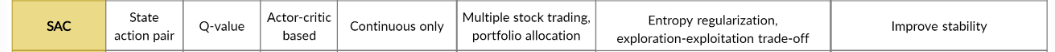

In [79]:
print("==============Model Training===========")
# now = datetime.datetime.now().strftime("%Y%m%d-%Hh%M")

model_sac = agent.get_model("sac")
trained_sac = agent.train_model(model=model_sac, tb_log_name="sac", total_timesteps=80000 )

==============Model Training===========
{'batch_size': 64, 'buffer_size': 100000, 'learning_rate': 0.0001, 'learning_starts': 100, 'ent_coef': 'auto_0.1'}
Using cuda device
Logging to tensorboard_log/sac/sac_1
---------------------------------
| time/              |          |
|    episodes        | 4        |
|    fps             | 44       |
|    time_elapsed    | 122      |
|    total timesteps | 5452     |
| train/             |          |
|    actor_loss      | -7.11    |
|    critic_loss     | 0.0616   |
|    ent_coef        | 0.0585   |
|    ent_coef_loss   | -46.2    |
|    learning_rate   | 0.0001   |
|    n_updates       | 5351     |
---------------------------------
---------------------------------
| time/              |          |
|    episodes        | 8        |
|    fps             | 43       |
|    time_elapsed    | 248      |
|    total timesteps | 10904    |
| train/             |          |
|    actor_loss      | -10.8    |
|    critic_loss     | 0.0264   |
|    ent

#Save Model

In [80]:
!mkdir -p saved_model
trained_sac.save('saved_model/my_modelBIST.h5') 

In [81]:
trained_sac

In [82]:
print("==============Start Trading===========")
e_trade_gym = StockTradingEnv(df=trade, turbulence_threshold=250, **env_kwargs)

df_account_value, df_actions = DRLAgent.DRL_prediction( model=trained_sac, environment = e_trade_gym)


==============Start Trading===========
hit end!


In [83]:
df_account_value

profit_list = []
ac_val = list(df_account_value["account_value"])
print(ac_val)
turn =len(ac_val)
for i in range(turn):
  
  if i != turn-1:

    diff = ac_val[i+1]  - ac_val[i]
    profit_list.append(diff)
  else:
    profit_list.append(float(0))
    
print(profit_list)


[1000.0, 1000.9415890965462, 1000.2678206276894, 997.3370491147042, 995.1732540860177, 994.1294444074631, 993.6394799222946, 996.3694422712326, 1011.8394492139817, 1011.9794524183274, 1014.2157531661989, 1012.039269060135, 1013.8793035449983, 1011.9592595996858, 1016.4692445697785, 1017.9292970600129, 1029.3192964496614, 1026.4769824590685, 1022.9737403264048, 1024.8748693242076, 1024.2975473637584, 1018.5675230259898, 1018.3588250145915, 1009.8888924584392, 1004.0488694176677, 1002.2888939843181, 1001.4098068337444, 1003.5798317055705, 1004.3498779397014, 1003.3998314003948, 1004.1098762612346, 1019.9198089699748, 1016.5198532204631, 1021.1397834877971, 1016.0698066811565, 1015.1798759560588, 1017.2798553566936, 1024.7798860039713, 1024.2998387780192, 1022.0021454319957, 1007.800832810879, 1004.0175316281321, 1006.2375547833445, 1013.007509464741, 1008.6075785107615, 1006.2075550503733, 1007.1774866528514, 1012.5527780528072, 1016.8127096171382, 1024.4327104563715, 1023.7227781291011,

In [84]:
new_df = df_account_value.copy()

new_df["diff"] = np.array(profit_list)

new_df

,date,account_value,diff
0,2021-04-30 09:30:00+03:00,1000.000000,0.941589
1,2021-04-30 10:30:00+03:00,1000.941589,-0.673768
2,2021-04-30 11:30:00+03:00,1000.267821,-2.930772
3,2021-04-30 12:30:00+03:00,997.337049,-2.163795
4,2021-04-30 13:30:00+03:00,995.173254,-1.043810
...,...,...,...
611,2021-08-27 12:30:00+03:00,846.064358,4.835624
612,2021-08-27 13:30:00+03:00,850.899983,-1.640038
613,2021-08-27 14:30:00+03:00,849.259945,1.640038
614,2021-08-27 15:30:00+03:00,850.899983,0.000000


In [85]:
%matplotlib inline

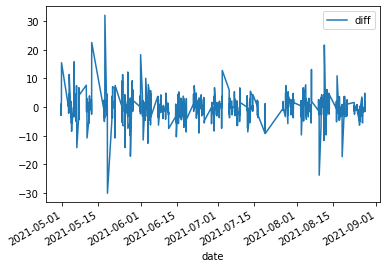

In [86]:
# hesaptaki günlük kar-zarar grafiği
new_df.plot(x='date', y='diff', kind = 'line')

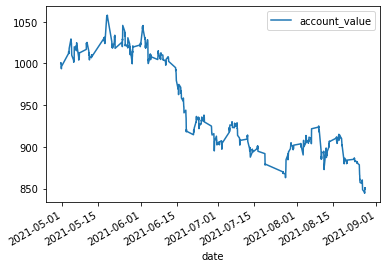

In [87]:
# total hesaptaki maliyetin değişimi
new_df.plot(x='date', y='account_value', kind = 'line')

In [88]:
df_actions

,ARCLK.IS,BIMAS.IS,EREGL.IS,GARAN.IS,PETKM.IS,SAHOL.IS,SASA.IS,THYAO.IS,TUPRS.IS,VESTL.IS
date,,,,,,,,,,
2021-04-30 09:30:00+03:00,0,0,0,99,0,0,7,0,0,1
2021-04-30 10:30:00+03:00,0,0,0,0,0,0,0,2,0,-1
2021-04-30 11:30:00+03:00,0,0,0,-2,0,2,0,0,0,0
2021-04-30 12:30:00+03:00,0,0,0,-44,0,0,0,26,0,0
2021-04-30 13:30:00+03:00,0,0,0,-53,0,47,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2021-08-27 11:30:00+03:00,0,0,0,0,0,0,0,0,0,0
2021-08-27 12:30:00+03:00,0,0,-2,0,-1,4,0,0,0,0
2021-08-27 13:30:00+03:00,0,0,0,0,0,0,0,0,0,0


In [89]:
import os
cwd = os.getcwd()
cwd

'/content/saved_model'

In [90]:
import os

now = datetime.now().strftime("%Y%m%d-%Hh%M")

os.chdir('/content/saved_model')


with open("./" + "/df_account_value_BIST" + now + ".csv", 'a') as f1:
    df_account_value.to_csv(f1, header=False)

with open("./"+ "/df_actions_BIST" + now + ".csv", 'a') as f2:
    df_actions.to_csv(f2, header=False)




 #Understanding Format of Variables:

In [61]:
train

,open,high,low,close,adj close,volume,tic,date,macd,rsi_30,cci_30,dx_30,turbulence
0,21.580000,21.620001,21.240000,21.360001,21.360001,0,ARCLK.IS,2020-08-31 09:30:00+03:00,0.000000,100.000000,-66.666667,100.000000,0.000000
0,70.000000,70.199997,69.500000,69.550003,69.550003,0,BIMAS.IS,2020-08-31 09:30:00+03:00,0.000000,100.000000,-66.666667,100.000000,0.000000
0,8.920000,8.960000,8.890000,8.930000,8.930000,0,EREGL.IS,2020-08-31 09:30:00+03:00,0.000000,100.000000,-66.666667,100.000000,0.000000
0,6.920000,6.930000,6.870000,6.890000,6.890000,0,GARAN.IS,2020-08-31 09:30:00+03:00,0.000000,100.000000,-66.666667,100.000000,0.000000
0,3.366667,3.366667,3.325000,3.333333,3.333333,0,PETKM.IS,2020-08-31 09:30:00+03:00,0.000000,100.000000,-66.666667,100.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1362,8.100000,8.110000,8.080000,8.100000,8.100000,1543958,SAHOL.IS,2021-04-29 16:30:00+03:00,0.025388,50.676788,3.982664,1.416739,1.033476
1362,36.680000,36.820000,36.439999,36.520000,36.520000,1278160,SASA.IS,2021-04-29 16:30:00+03:00,0.547684,58.963782,40.814010,32.703240,1.033476
1362,11.970000,12.000000,11.940000,11.950000,11.950000,2725070,THYAO.IS,2021-04-29 16:30:00+03:00,0.079267,55.286712,39.362380,32.961973,1.033476
1362,88.250000,88.400002,87.949997,88.050003,88.050003,172541,TUPRS.IS,2021-04-29 16:30:00+03:00,0.416211,53.989410,153.090673,37.484313,1.033476


In [62]:
trade

,open,high,low,close,adj close,volume,tic,date,macd,rsi_30,cci_30,dx_30,turbulence
0,34.840000,34.980000,34.540001,34.799999,34.799999,0,ARCLK.IS,2021-04-30 09:30:00+03:00,0.643241,60.883824,92.942477,43.790854,14.714308
0,66.050003,66.300003,65.949997,66.050003,66.050003,0,BIMAS.IS,2021-04-30 09:30:00+03:00,-0.065249,45.620677,-71.533364,10.528709,14.714308
0,19.299999,19.430000,19.090000,19.379999,19.379999,0,EREGL.IS,2021-04-30 09:30:00+03:00,0.084209,60.493441,24.167156,15.248851,14.714308
0,7.250000,7.280000,7.220000,7.230000,7.230000,0,GARAN.IS,2021-04-30 09:30:00+03:00,0.029884,56.549935,124.955057,32.667865,14.714308
0,6.690000,6.780000,6.680000,6.750000,6.750000,0,PETKM.IS,2021-04-30 09:30:00+03:00,0.072501,65.056698,199.399400,52.990802,14.714308
...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,10.350000,10.410000,10.340000,10.350000,10.350000,2369038,SAHOL.IS,2021-08-27 16:30:00+03:00,0.030801,58.836493,120.973299,18.533161,6.811579
615,27.100000,27.160000,27.020000,27.059999,27.059999,1623636,SASA.IS,2021-08-27 16:30:00+03:00,-0.191565,38.249147,-85.177032,18.768613,6.811579
615,12.600000,12.650000,12.590000,12.600000,12.600000,7828146,THYAO.IS,2021-08-27 16:30:00+03:00,-0.020177,49.674208,-93.213471,16.784044,6.811579
615,99.300003,99.550003,99.150002,99.199997,99.199997,545211,TUPRS.IS,2021-08-27 16:30:00+03:00,-0.305628,46.250324,-75.757453,13.631107,6.811579


In [63]:
e_train_gym

In [64]:
agent

In [65]:
model_sac

In [70]:
trained_sac

In [69]:
e_trade_gym

In [67]:
df_account_value

,date,account_value
0,2021-04-30 09:30:00+03:00,1.000000e+06
1,2021-04-30 10:30:00+03:00,1.000031e+06
2,2021-04-30 11:30:00+03:00,1.000067e+06
3,2021-04-30 12:30:00+03:00,9.998164e+05
4,2021-04-30 13:30:00+03:00,9.995483e+05
...,...,...
611,2021-08-27 12:30:00+03:00,1.005720e+06
612,2021-08-27 13:30:00+03:00,1.009812e+06
613,2021-08-27 14:30:00+03:00,1.007295e+06
614,2021-08-27 15:30:00+03:00,1.008170e+06


In [66]:
df_actions

,ARCLK.IS,BIMAS.IS,EREGL.IS,GARAN.IS,PETKM.IS,SAHOL.IS,SASA.IS,THYAO.IS,TUPRS.IS,VESTL.IS
date,,,,,,,,,,
2021-04-30 09:30:00+03:00,100,100,100,0,0,100,100,0,100,100
2021-04-30 10:30:00+03:00,100,100,100,0,0,100,100,0,100,100
2021-04-30 11:30:00+03:00,100,100,100,0,0,100,100,0,100,100
2021-04-30 12:30:00+03:00,100,100,100,0,0,100,100,0,100,100
2021-04-30 13:30:00+03:00,100,100,100,0,0,100,100,0,100,100
...,...,...,...,...,...,...,...,...,...,...
2021-08-27 11:30:00+03:00,0,0,0,0,0,0,0,0,0,0
2021-08-27 12:30:00+03:00,0,0,0,0,0,0,0,0,0,0
2021-08-27 13:30:00+03:00,0,0,0,0,0,0,0,0,0,0
